# K nearest neigbhors regression demo

In this demo, we see how K-nn regression behaves on a simple toy problem. 

## Simulation

The data is generated by the function

$$y = sin(2\pi x) +\epsilon $$ where $x$ is the input attribute, $y$ the target variable and $\epsilon$ random noise. On most real data science problems we would have (many) more input attributes, but this simple setting is considered here so we can visualize the results with (x,y)-plots. We restrict ourselves to interval $x\in[0,1]$.

## Goal of this demo

To visualize what k-nn does, and demonstrate the importance of controlling model complexity to find balance between over- and underfitting

## Imported functions

KNeighborsRegressor implements k-nn regressor. With default parameters it predicts the mean of the y-value of the k training instances closest to the test instance. 

mean_squared_error computes $\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2$, that is, the squared difference betweeen true target values $y_i$ and the predicted target values $\hat{y}_i$. We use it to characterize how close the predictions of k-nn are to the real target function over the interval $[0,1]$.

In [1]:
import numpy as np
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#simulation:
#x uniformly distributed between 0 and 1
#y = sin(2*pi*x) + epsilon, where epsilon is random Gaussian noise
def generate(n, seed, noise=0.1):
    #create an instance of numpy pseudo-random number generator
    generator = np.random.RandomState(seed)
    x = generator.uniform(0,1,n)
    y = np.sin(2*np.pi*x) + noise*generator.randn(n)
    return x, y

#this function initializes a knn-regression model on
#x_train and y_train, and returns predictions on x_test
def knn_predictions(x_train, y_train, x_test, k):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train.reshape(-1, 1), y_train)
    pred = knn.predict(x_test.reshape(-1,1))
    return pred



## Visualization of the data

x-axis: the input attribute

y-axis: the target value we would like to learn to predict from x

green line: the real (unknown) target function

blue points: our training data (x,y) pairs visualized

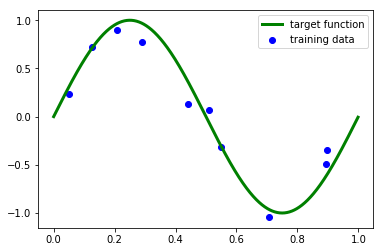

In [9]:
import matplotlib.pyplot as plt
x_train, y_train = generate(10, 3, 0.15)
plt.scatter(x_train,y_train, color="blue", label="training data")
    t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2 * np.pi * t)
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.show()

# Fitting k-nn to the data

Below we fit two k-nn models to the data, k=1 and k=2. Note that k=1 model perfectly interpolates the data, while k=2 model averaged over two closest neigbhors no longer exactly interpolates training data.

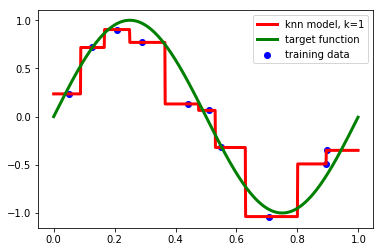

In [3]:
s_pred = knn_predictions(x_train, y_train, t, 1)
plt.scatter(x_train,y_train, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="knn model, k=1")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.show()

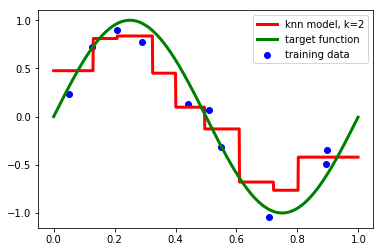

In [4]:
s_pred = knn_predictions(x_train, y_train, t, 2)
plt.scatter(x_train,y_train, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="knn model, k=2")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.show()

## Second simulation

We increase the amount of noise $(\epsilon)$ in the data and generate 100 more instances.

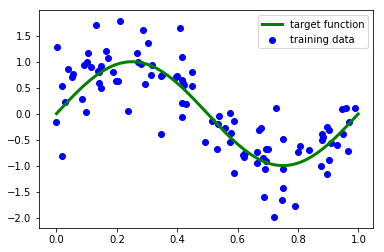

In [5]:
x_train2, y_train2 = generate(100, 1, 0.5)
plt.scatter(x_train2, y_train2, color="blue", label="training data")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.show()

## Three k-nn models

We compare how well three k-nn models work on this data
k=1 interpolates training data perfectly but failing to capture true target function well (overfitting)
k=9 is the best choice on this data
k=75 is already close to predicting just the mean value of training data, and does not capture the shape of the target function well (underfitting)

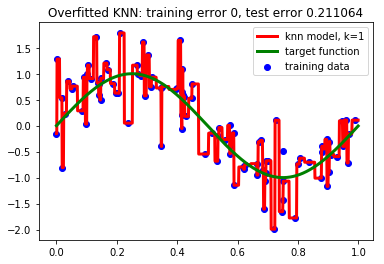

In [6]:
s_pred = knn_predictions(x_train2, y_train2, t, 1)
plt.scatter(x_train2,y_train2, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="knn model, k=1")
plt.plot(t,s, linewidth=3, color="green", label="target function")
test_error = mean_squared_error(s, s_pred)
plt.title("Overfitted KNN: training error 0, test error %f" %test_error)
plt.legend()
plt.show()

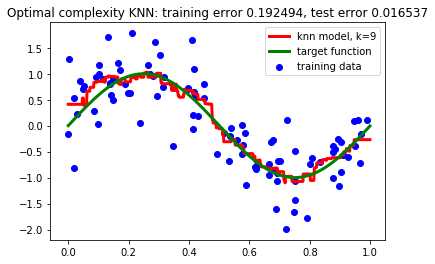

In [7]:
s_pred = knn_predictions(x_train2, y_train2, t, 9)
y_train2_pred = knn_predictions(x_train2, y_train2, x_train2, 9)
train_error = mean_squared_error(y_train2, y_train2_pred)
test_error = mean_squared_error(s, s_pred)
plt.title("Optimal complexity KNN: training error %f, test error %f" %(train_error, test_error))
plt.scatter(x_train2,y_train2, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="knn model, k=9")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.show()

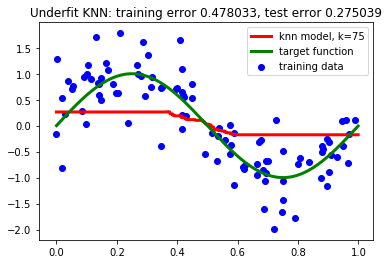

In [8]:
s_pred = knn_predictions(x_train2, y_train2, t, 75)
y_train2_pred = knn_predictions(x_train2, y_train2, x_train2, 75)
train_error = mean_squared_error(y_train2, y_train2_pred)
test_error = mean_squared_error(s, s_pred)
plt.title("Underfit KNN: training error %f, test error %f" %(train_error, test_error))
plt.scatter(x_train2,y_train2, color="blue", label="training data")
plt.plot(t, s_pred, linewidth=3, color="red", label="knn model, k=75")
plt.plot(t,s, linewidth=3, color="green", label="target function")
plt.legend()
plt.show()

## Questions to think about

Here we could choose optimal model complexity since we knew the real target function. How to choose model complexity on real problems where we never have access to the true function but only a sample of data?

Can you easily see the connection between the smoothness of the k-nn prediction function and the value of k. Play around with k-values k=2... to see how k-nn behaves.

How does optimal value of k depend on the amount of noise in the data? You can check this by playing around with the data generator and different values for "noise" parameter.

When you encounter new types of model classes (=hypothesis sets) such as linear models, decision trees, neural networks etc., start by finding out how you can tune the complexity of this particular class of models. The math may differ, but the general principle you saw here in action applies in all areas of (machine) learning.
